In [1]:
num_nodes = 5
edges = [(0,1),(0,4),(1,2),(1,3),(1,4),(2,3),(3,4)]

In [2]:
for n1,n2 in edges:
    print(n1,n2)

0 1
0 4
1 2
1 3
1 4
2 3
3 4


In [3]:
class Graph:
    def __init__(self,num_nodes,edges):
        self.num_nodes = num_nodes
        self.data = [[] for _ in range(num_nodes)]
#         print(self.data)
        for n1,n2 in edges:
            self.data[n1].append(n2)
            self.data[n2].append(n1)
            print(self.data)
            
    def __repr__(self):
        #adjacency list
        return "\n".join(["{}: {}".format(n, neighbours) for n, neighbours in enumerate(self.data) ])
    
    def __str__(self):
        return self.__repr__()
            
            

In [4]:
graph1 = Graph(num_nodes,edges)

[[1], [0], [], [], []]
[[1, 4], [0], [], [], [0]]
[[1, 4], [0, 2], [1], [], [0]]
[[1, 4], [0, 2, 3], [1], [1], [0]]
[[1, 4], [0, 2, 3, 4], [1], [1], [0, 1]]
[[1, 4], [0, 2, 3, 4], [1, 3], [1, 2], [0, 1]]
[[1, 4], [0, 2, 3, 4], [1, 3], [1, 2, 4], [0, 1, 3]]


In [5]:
graph1.data

[[1, 4], [0, 2, 3, 4], [1, 3], [1, 2, 4], [0, 1, 3]]

In [6]:
graph1

0: [1, 4]
1: [0, 2, 3, 4]
2: [1, 3]
3: [1, 2, 4]
4: [0, 1, 3]

 # Graph Traversal
 ## BFS

In [7]:
 def bfs(graph,root):
        queue = []
        visited = [False]* len(graph.data)
        distance = [None]* len(graph.data)
        parent = [None]* len(graph.data)
        
        visited[root] = True
        queue.append(root)
        distance[root] = 0
        idx = 0
        
        while idx < len(queue):
            # dequeue operation
            current = queue[idx]
            idx+=1
            
            # check all edges of current node
            for node in graph.data[current]:
                if not visited[node]:
                    distance[node] = 1 + distance[current]
                    parent[node] = current
                    visited[node] = True
                    queue.append(node)
                    
        return queue,distance,parent
            
            

In [8]:
 def bfs(graph,root):
        queue = []
        visited = [False]* len(graph.data)     
        visited[root] = True
        queue.append(root)
        idx = 0
        
        while idx < len(queue):
            current = queue[idx] # dequeue operation
            idx+=1
            
            # check all edges of current node
            for node in graph.data[current]:
                if not visited[node]:
                    visited[node] = True
                    queue.append(node)
                    
        return queue
            

In [9]:
graph1

0: [1, 4]
1: [0, 2, 3, 4]
2: [1, 3]
3: [1, 2, 4]
4: [0, 1, 3]

In [10]:
graph1.data[1]

[0, 2, 3, 4]

In [11]:
bfs(graph1,4)

[4, 0, 1, 3, 2]

## DFS

In [12]:
graph1

0: [1, 4]
1: [0, 2, 3, 4]
2: [1, 3]
3: [1, 2, 4]
4: [0, 1, 3]

In [13]:
def dfs(graph,root):
    stack = []
    visited = [False] * len(graph.data)
    res = []
    
    stack.append(root)
    
    while len(stack)>0:
        current = stack.pop()
        if not visited[current]:
            visited[current] = True
            res.append(current)

            for node in graph.data[current]:
                if not visited[node]:
                    stack.append(node)
        
    return res
    

In [14]:
dfs(graph1,3)

[3, 4, 1, 2, 0]

# Weighted Graphs
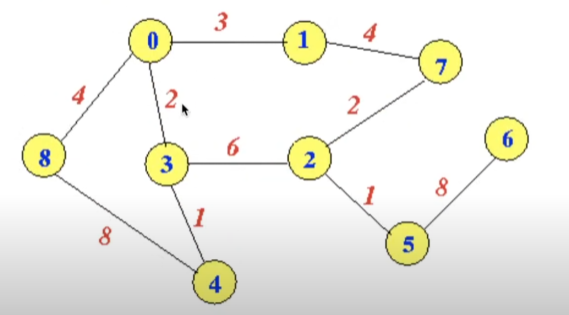

In [15]:
num_nodes1 = 9 
edges1 = [(0,1,3),(0,3,2),(0,8,4),(1,7,4),(2,7,2),
          (2,3,6),(2,5,1),(3,4,1),(4,8,8),(5,6,8)]
num_nodes1, len(edges1)

(9, 10)

# Directed Graph
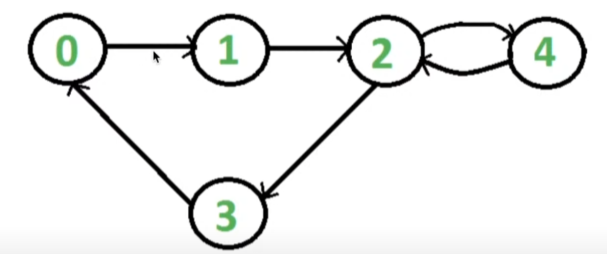

In [16]:
num_node2 = 5
edges2 = [(0,1),(1,2),(2,3),(2,4),(4,2),(3,0)]
directes2 = True
num_node2, len(edges2)

(5, 6)

In [17]:
class Graph:
    def __init__(self,num_nodes,edges,directed=False,weighted=False):
        self.num_nodes = num_nodes
        self.directed = directed
        self.weighted = weighted
        self.data = [[] for _ in range(num_nodes)]
        self.weight = [[] for _ in range(num_nodes)] 
        for edge in edges:
            if self.weighted:
                node1,node2,weight = edge
                self.data[node1].append(node2)
                self.weight[node1].append(weight)
                if not directed:
                    self.data[node2].append(node1)
                    self.weight[node2].append(weight)
            else:
                node1 ,node2 = edge
                self.data[node1].append(node2)
                if not directed:
                    self.data[node2].append(node1)
        
    def __repr__(self):
        
        result = ""
        if self.weighted:
            for i , (nodes,weights) in enumerate(zip(self.data,self.weight)):
                result+='{}: {}\n'.format(i,list(zip(nodes,weights)))
        else:
            for i, nodes in enumerate(self.data):
                result+='{}: {}\n'.format(i,nodes)
        return result
    
    def __str__(self):
        return self.__repr__()

In [18]:
graph2 = Graph(num_nodes,edges)

In [19]:
graph2

0: [1, 4]
1: [0, 2, 3, 4]
2: [1, 3]
3: [1, 2, 4]
4: [0, 1, 3]

In [20]:
graph3 = Graph(num_nodes1,edges1,weighted=True)

In [21]:
edges1

[(0, 1, 3),
 (0, 3, 2),
 (0, 8, 4),
 (1, 7, 4),
 (2, 7, 2),
 (2, 3, 6),
 (2, 5, 1),
 (3, 4, 1),
 (4, 8, 8),
 (5, 6, 8)]

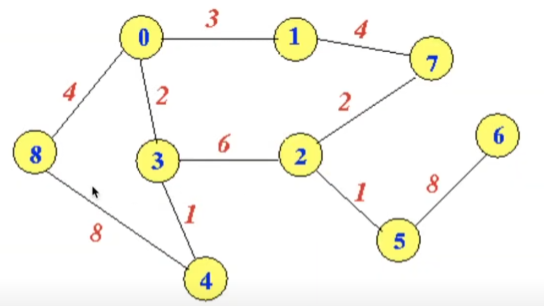

In [22]:
graph3

0: [(1, 3), (3, 2), (8, 4)]
1: [(0, 3), (7, 4)]
2: [(7, 2), (3, 6), (5, 1)]
3: [(0, 2), (2, 6), (4, 1)]
4: [(3, 1), (8, 8)]
5: [(2, 1), (6, 8)]
6: [(5, 8)]
7: [(1, 4), (2, 2)]
8: [(0, 4), (4, 8)]

# Directed Graph
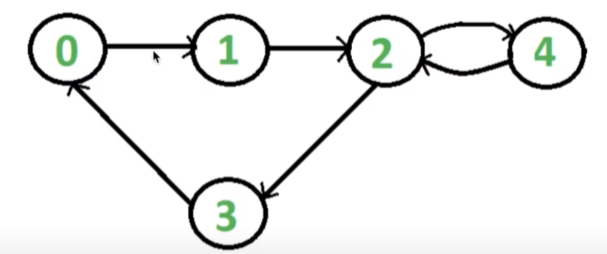

In [23]:
num_nodes2 = 5
edges2 = [(0,1),(1,2),(2,3),(2,4),(4,2),(3,0)]
directes2 = True
num_nodes2, len(edges2)

(5, 6)

In [24]:
graph_dir = Graph(num_nodes2,edges2,directed=True)

In [25]:
graph_dir

0: [1]
1: [2]
2: [3, 4]
3: [0]
4: [2]

# Shortest Path

## Dijkstra's Algorithm

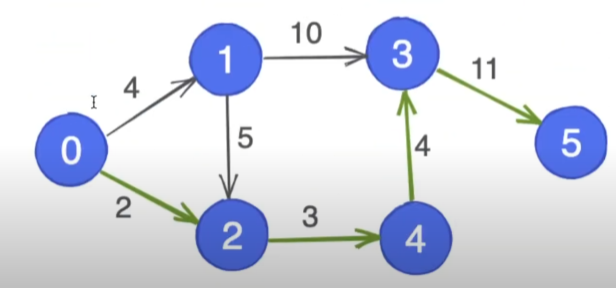

In [26]:
num_nodes7 = 6
edges7 = [(0,1,4),(0,2,2),(1,2,5),(1,3,10),(2,4,3),(3,5,11),(4,3,4)]
num_nodes7,len(edges7)

(6, 7)

In [27]:
def update_distances(graph,current,distance,parent = None):
    neighbors = graph.data[current]
    weights = graph.weight[current]
    for i, node in enumerate(neighbors):
        weight = weights[i]
        if distance[current] + weight < distance[node]:
            distance[node] = distance[current] + weight
            if parent :
                parent[node] = current
                
                
def pick_next_node(distance,visited):
    min_distance = float('inf')
    min_node = None
    for node in range(len(distance)):
        if not visited[node] and distance[node] < min_distance:
            min_node = node
            min_distance = distance[node]
    return min_node

In [28]:
def shortest_path(graph,source,target):
    visited = [False]*len(graph.data)
    parent = [None]*len(graph.data)
    distance = [float('inf')] * len(graph.data)
    queue = []
    
    
    distance[source] = 0
    queue.append(source)
    idx = 0
    
    while idx < len(queue) and not visited[target]:
        current = queue[idx]
        visited[current] =True
        idx+=1
        update_distances(graph,current,distance,parent)
        next_node = pick_next_node(distance,visited)
        if next_node:
            queue.append(next_node)
        

    return distance[target],parent
        
        
        
    

In [29]:
graph7 = Graph(num_nodes7,edges7,weighted=True,directed = True)

In [30]:
graph7

0: [(1, 4), (2, 2)]
1: [(2, 5), (3, 10)]
2: [(4, 3)]
3: [(5, 11)]
4: [(3, 4)]
5: []

In [31]:
shortest_path(graph7,0,5)

(20, [None, 0, 0, 4, 2, 3])

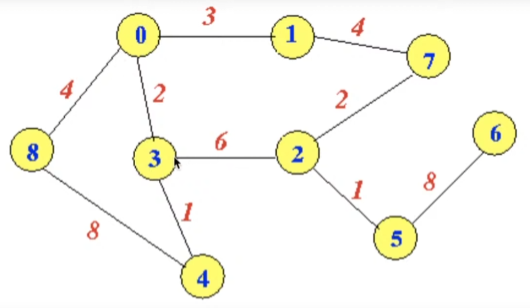

In [32]:
shortest_path(graph3,2,8)

(15, [3, 7, None, 2, 3, 2, 5, 2, 4])

## Union - Find

## Practice Ques